In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.misc import factorial
import math
import statistics as stats
from scipy.misc import factorial

In [30]:
#Exercise 1

heads = 1
tails = 0

N = 20  #N is the number of trials
M = 100000  #M is the number of realizations.  I found it needs to be able 100000 to give very consistent results
counts = np.zeros(N+1)  #a list the length of the number of possible outcomes.  0 heads, 1 head, 2 heads ... N heads.

for i in range (0,M):  #loop through realizations, counting the number of heads each realization.
    draw = np.random.randint(2, size=N)
    heads_count = len(draw[(np.where(draw == 1))])
    tails_count = len(draw[(np.where(draw == 0))])
    counts[heads_count] = counts[heads_count] + 1  

observed_probability = counts/(M)  #calculates observed probability of each number of heads being the outcome.
print(observed_probability)

plt.bar(np.arange(N+1), counts/M)  #creates histogram of probabilities for each number of heads
#the peak is at 10 which is what I would expect because the probability of heads each flip is 50%.  Therefore, the total number of heads should usually be half the number of fips. 

[  0.00000000e+00   2.00000000e-05   1.70000000e-04   1.12000000e-03
   5.11000000e-03   1.53000000e-02   3.75900000e-02   7.47300000e-02
   1.18890000e-01   1.60270000e-01   1.77000000e-01   1.58900000e-01
   1.19840000e-01   7.41700000e-02   3.62000000e-02   1.47100000e-02
   4.74000000e-03   1.13000000e-03   1.00000000e-04   1.00000000e-05
   0.00000000e+00]


<Container object of 21 artists>

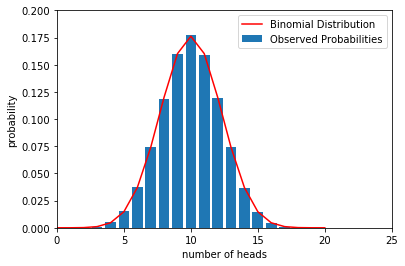

In [32]:
#this function returns the binomial distribution for N trials when p is 0.5
def Binomial_Simplified(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N)
    return PNx
plt.plot(np.arange(N+1), Binomial_Simplified(N), 'r')
plt.xlabel("number of heads")
plt.ylabel("probability")
plt.legend(["Binomial Distribution","Observed Probabilities"])
plt.axis([0, 25, 0, 0.2])
plt.show()



In [4]:
expectation_value = 0

#this loop determines expectation value for the emperical results
for i in range (0,N):
    next_term = i*observed_probability[i]
    expectation_value = expectation_value + next_term
print(expectation_value)


#now repeat process for N = 40

N = 40 
counts = np.zeros(N+1)  

for i in range (0,M):  
    draw = np.random.randint(2, size=N)
    heads_count = len(draw[(np.where(draw == 1))])
    tails_count = len(draw[(np.where(draw == 0))])
    counts[heads_count] = counts[heads_count] + 1  

observed_probability = counts/(M)

expectation_value = 0

for i in range (0,N):
    next_term = i*observed_probability[i]
    expectation_value = expectation_value + next_term
print(expectation_value)

#the numerical values are very similar to the analytical values, likely because M is large enough.

10.00094
19.99154


In [38]:
#Exercise 2

heads = 1
tails = 0
p = 0.1  
N = 100
M = 100000
counts = np.zeros(N+1)

#this loop is the same as in exercise 1, but for a variable p value.  A float value between 0 and 1 is drawn.  All greater than p are a success.
for i in range (0,M):  
    draw = np.random.uniform(0,1,size=N)
    heads_count = len(draw[(np.where(draw < p))])
    tails_count = len(draw[(np.where(draw > p))])
    counts[heads_count] = counts[heads_count] + 1  

numerical_probabilities = plt.bar(np.arange(N+1), counts/M)

 

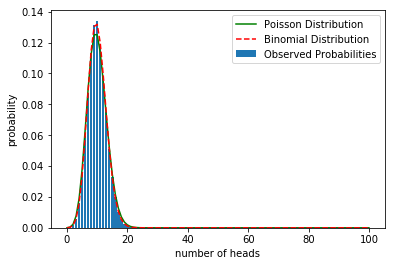

In [39]:
   
#this function calculates the Poisson distibution analytically, using the same idea as the function for the binomial distribution, but with the poisson formula

def Poisson(N,p):
    x = (np.arange(N+1))
    Poisson = math.exp((-1)*N*p)*(N*p)**(x)/factorial(x)
    return Poisson
numerical_poisson = Poisson(N,p)
poisson_dist = plt.plot(np.arange(N+1),numerical_poisson, color='g')

#this function calculates the Binomial distribution analytically the same as before but with varying probability

def Binomial(N,p):
    x = (np.arange(N+1))
    binomial = factorial(N)/((factorial(x)*factorial(N-x)))*(p**x)*(1-p)**(N-x)
    return binomial

numerical_binomial = Binomial(N,p)
binomial_dist = plt.plot(np.arange(N+1), numerical_binomial, color='r', linestyle='--')
plt.ylabel("probability")
plt.xlabel("number of heads")
plt.legend(['Poisson Distribution','Binomial Distribution','Observed Probabilities'])
plt.show()

variance[5] =  5.24439424
mean[5] =  5.5524


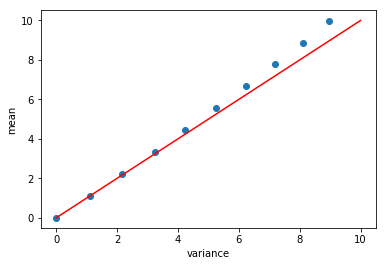

In [44]:
second_moment = 0
first_moment = 0
    
variance_list = [] #create lists to add variance and mean for different p's to plot 
first_moment_list = []
for p in np.linspace(0,0.1,10): #loops through several different p values
    second_moment = 0
    first_moment = 0
    counts = np.zeros(N+1) 
    for i in range (0,M):  #finds observed probability for given p. Same loop as before
        draw = np.random.uniform(0,1,size=N)
        heads_count = len(draw[(np.where(draw < p))])
        tails_count = len(draw[(np.where(draw > p))])
        counts[heads_count] = counts[heads_count] + 1  

    observed_probability = counts/(M)

    for i in range (0,N): #calculates second moment for each p
        next_term = (i**2)*observed_probability[i]
        second_moment += next_term

    for i in range (0,N): #calculates first moment (mean) for each p
        next_term = (i)*observed_probability[i]
        first_moment += next_term

    variance = second_moment - first_moment**2 #calculates variance for each p
    first_moment_list.append(first_moment) #adds variance and mean for each p to list for plot
    variance_list.append(variance)  

print("variance[5] = ", variance_list[5]) #comparison of variance and mean for given p
print("mean[5] = ", first_moment_list[5])    
plt.scatter(variance_list,first_moment_list) #plot of mean vs variance for several p's
plt.plot([0, 10], [0, 10], 'r')
plt.ylabel("mean")
plt.xlabel("variance")
plt.show()

#this is as expected because in the poission distribution the mean and variance are equal

variance[5] =  0.5527037936
mean[5] =  0.55492


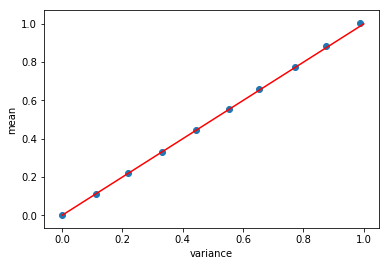

In [50]:
#repeat of previous cell, but with p from 0 to 0.01
second_moment = 0
first_moment = 0
    
variance_list = [] #create lists to add variance and mean for different p's to plot 
first_moment_list = []
for p in np.linspace(0,0.01,10): #loops through several different p values
    second_moment = 0
    first_moment = 0
    counts = np.zeros(N+1) 
    for i in range (0,M):  #finds observed probability for given p. Same loop as before
        draw = np.random.uniform(0,1,size=N)
        heads_count = len(draw[(np.where(draw < p))])
        tails_count = len(draw[(np.where(draw > p))])
        counts[heads_count] = counts[heads_count] + 1  

    observed_probability = counts/(M)

    for i in range (0,N): #calculates second moment for each p
        next_term = (i**2)*observed_probability[i]
        second_moment += next_term

    for i in range (0,N): #calculates first moment (mean) for each p
        next_term = (i)*observed_probability[i]
        first_moment += next_term

    variance = second_moment - first_moment**2 #calculates variance for each p
    first_moment_list.append(first_moment) #adds variance and mean for each p to list for plot
    variance_list.append(variance)  

print("variance[5] = ", variance_list[5]) #comparison of variance and mean for given p
print("mean[5] = ", first_moment_list[5])    
plt.scatter(variance_list,first_moment_list) #plot of mean vs variance for several p's
plt.plot([0, 1], [0, 1], 'r')
plt.ylabel("mean")
plt.xlabel("variance")
plt.show()